In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING THE DATA 

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.shape

(2227, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


## MISSING VALUE TREATMENT 

In [7]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


## VISUALIZING THE DATA

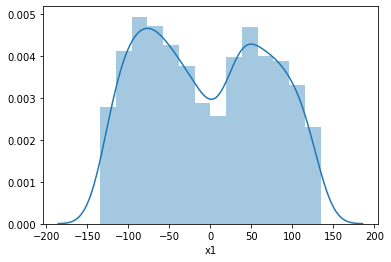

In [14]:
sns.distplot(df['x1'])

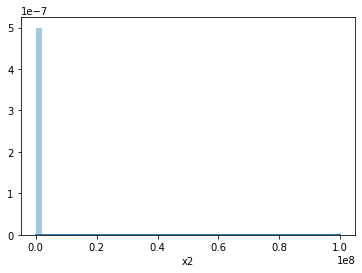

In [15]:
sns.distplot(df['x2'])

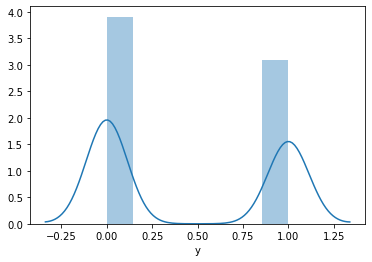

In [16]:
sns.distplot(df['y'])

## OUTLIER TREATMENT 

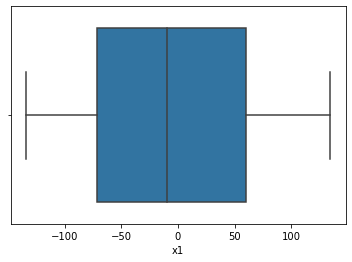

In [12]:
sns.boxplot(data=df,x='x1')

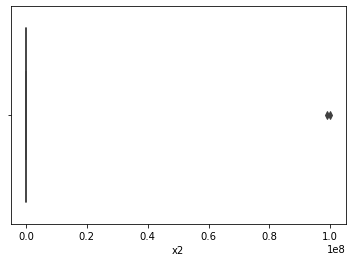

In [13]:
sns.boxplot(data=df,x='x2')

In [17]:
df.y.value_counts()

0    1238
1     981
Name: y, dtype: int64

In [18]:
Q1, Q3 = df["x2"].quantile([0.25,0.75])
IQR = Q3-Q1
Upper_limit = Q3 + (1.5 * (IQR))
print("Upper limit = ", round(Upper_limit))

Upper limit =  280


In [19]:
df["x2"] = df["x2"].map(lambda x: 280 if x > 280 else x)

In [20]:
df.describe()

,x1,x2,y
count,2219.000000,2219.000000,2219.000000
mean,-4.771837,-6.472136,0.442091
std,74.938264,80.270623,0.496747
min,-134.369160,-134.876132,0.000000
25%,-71.581453,-80.259658,0.000000
50%,-9.750840,-1.566092,0.000000
75%,59.963056,63.904483,1.000000
max,134.508687,280.000000,1.000000


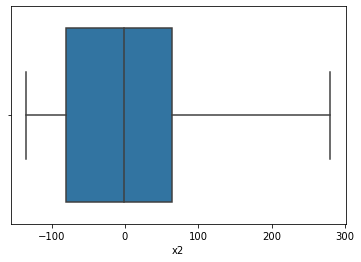

In [21]:
sns.boxplot(data=df,x='x2')

## SPLITTING THE DATA

In [22]:
y=df['y']
X=df.drop('y',axis=1)


In [23]:
from sklearn.preprocessing import StandardScaler
features = X.columns
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(2219, 2)


In [24]:
new_df = pd.DataFrame(standardized_data,columns = features)
new_df.head()

,x1,x2
0,-1.529535,1.513624
1,-1.285831,1.299016
2,-1.675180,1.411043
3,-1.467293,1.341610
4,-1.529535,1.513624


## TRAIN  TEST  SPLIT

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y, train_size=0.8, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1775, 2) (1775,)
(444, 2) (444,)


In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

## LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

In [41]:
tuned_parameters = [{'C':[0,1, 2, 3, 4, 5,6,7,8]}]
Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf =RandomizedSearchCV (
       LogisticRegression(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


for accuracy
Best parameters set found on train set:
{'C': 2}
LogisticRegression(C=2)

0.7454954954954955
for precision
Best parameters set found on train set:
{'C': 2}
LogisticRegression(C=2)

0.989010989010989
for recall
Best parameters set found on train set:
{'C': 2}
LogisticRegression(C=2)

0.44554455445544555


**Considering C=2 as precision is 98.9 %**

In [42]:
classifier = LogisticRegression(C=2, penalty='l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [43]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7454954954954955

**Accuracy with Logistic Regression = 74.5 %**

## DECISION TREE 

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tuned_parameters = [{'max_depth':[2,3,4,5,6,7,8]}]
Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf =RandomizedSearchCV (
       DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


for accuracy
Best parameters set found on train set:
{'max_depth': 6}
DecisionTreeClassifier(max_depth=6)

0.9481981981981982
for precision
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

1.0
for recall
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)

0.905940594059406


In [46]:
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train,y_train)
y_test_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7454954954954955

**Accuracy with Decision Tree = 74.5 %**

## K-NEAREST NEIGHBOR

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]
Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:
    clf = RandomizedSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 5}
KNeighborsClassifier(p=3)

0.9414414414414415
for precision
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4, p=3)

0.9591836734693877
for recall
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 5}
KNeighborsClassifier(p=3)

0.9405940594059405


In [49]:
classifier = KNeighborsClassifier(n_neighbors=4,p=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9504504504504504

**Accuracy with KNN model = 95.04 %**

## SVM WITH LINEAR KERNEL 

In [50]:
from sklearn.svm import SVC

In [51]:
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]}]

Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf = RandomizedSearchCV(
        SVC(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'kernel': 'linear', 'C': 1}
SVC(C=1, kernel='linear')

0.740990990990991
for precision
Best parameters set found on train set:
{'kernel': 'linear', 'C': 1}
SVC(C=1, kernel='linear')

0.9887640449438202
for recall
Best parameters set found on train set:
{'kernel': 'linear', 'C': 1}
SVC(C=1, kernel='linear')

0.43564356435643564


In [52]:
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.740990990990991

**Accuracy with SVM  (Kernel=linear) = 74.09 %**

## SVM  WITH  RBF  KERNEL

In [53]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100]}]

Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf = RandomizedSearchCV(
        SVC(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.30435757597703217, 'C': 100}
SVC(C=100, gamma=0.30435757597703217)

0.9527027027027027
for precision
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.019097535591699466, 'C': 1}
SVC(C=1, gamma=0.019097535591699466)

1.0
for recall
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.30435757597703217, 'C': 10}
SVC(C=10, gamma=0.30435757597703217)

0.9653465346534653


In [55]:
classifier = SVC(kernel='rbf', gamma=0.019097535591699466, C=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8423423423423423

**Accuracy with SVM  (kernel-rbf) = 84.23 %**

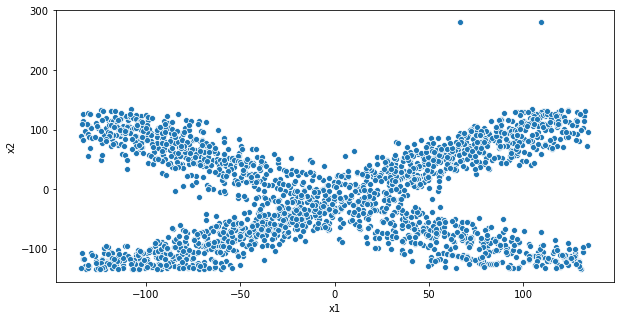

In [63]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=df, x='x1',y='x2')

**OBSERVATION** : After comparing all the above models, we can conclude than KNN model has the highest accuracy i.e, 95.04 % , as the datapoints are close to eachother.